# Average return multiplied by  the average trade sign

$$ r_{i} (t,\tau) = \log m_{i}(t + \tau) - \log m_{i}(t) = \log \frac{m_{i}(t + \tau)}{m_{i}(t)} $$
$$ R_{ij}^{(exc. 0)}(\tau) \ne \left \langle r_{i}\left ( t, \tau \right ) \right \rangle \left \langle \epsilon_{j} \left ( t \right ) \right \rangle $$

Implementation of the right side of the last equation

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
ticker_j = 'MSFT'
day = '09'

In [ ]:
def avg_return_avg_trade(ticker_i, ticker_j, day, tau_val):
    '''
    Obtain the result of the product between the averaged midpoint log return of ticker i and the averaged trade 
    signs of ticker j during different time lags. The data is adjusted to use only the values each 1000 ms = 1 s
    
    ticker_i -- String of the abbreviation of the midpoint stock to be analized (i.e. 'AAPL')
    ticker_j -- String of the abbreviation of the trade sign stock to be analized (i.e. 'AAPL')
    day -- String of the day to be analized (i.e '07')
    tau_val -- Maximum time lag to be analyzed
    
    return None
    '''
    
    print('Product between the averaged midpoint log return of ticker i and the averaged trade signs of ticker j data')
    print('Processing data for the stock i ' + ticker_i + ' and stock j ' + ticker_j + ' the day ' + day + ' March, 2016')
    
    # Load data
    midpoint_i = pickle.load(open('../Data/midpoint_data/midpoint_201603%s_%s.pickl' % (day,ticker_i), 'rb'))
    trade_sign_j = pickle.load(open('../Data/trade_signs_data/trade_signs_most_201603%s_%s.pickl' % (day,ticker_j), 'rb'))
    time = pickle.load(open('../Data/midpoint_data/time.pickl', 'rb'))
    
    # Setting variables to work with 1s accuracy
    
    avg_return_sign = np.zeros(tau_val)   # Array of the average of each tau. 10^3 s used by Wang

    midpoint_i_sec = midpoint_i[::1000] # Using values each second
    time_sec = time[::1000] # Changing time from ms to s

    trade_sign_j_sec_sum = np.sum(np.reshape(trade_sign_j, (1000, -1)), axis = 0) # Reshape the array in group of values
                                        # of 1000 (1s) and infer the number of rows, then sum all rows.
    trade_sign_j_sec_avg = 1 * (trade_sign_j_sec_sum > 0) - 1 * (trade_sign_j_sec_sum < 0) # Reasign the trade sign,
                                        # if the value of the array is greater than 0 gives a 1 and -1 for the contrary.
    trade_sign_j_sec_nr = np.sum(np.reshape(np.absolute(trade_sign_j), (1000, -1)), axis = 0) # Reshape the array in group
                                        # values of 1000 (1s) and infer the number of rows, then sum the absolute value of
                                        # all rows. This is used to know where a trade sign is cero.

    # Calculating the midpoint log return and the cross response functions
    
    for tau in range(1,tau_val):
    
        log_return_i_sec = 0. * time_sec # Every second have a log-return
        
        # Obtain the midpoint log return. Displace the numerator tau values to the right and compute the return,
        # and append the remaining values of tau with zeros
        log_return_i_sec = np.append(np.log(midpoint_i_sec[tau:]/midpoint_i_sec[:-tau]),np.zeros(tau))

        avg_return_sign[tau] = (np.mean(log_return_i_sec[trade_sign_j_sec_nr != 0]) * 
                                np.mean(trade_sign_j_sec_avg[trade_sign_j_sec_nr!=0]))
    
    # Saving data
    
    pickle.dump(avg_return_sign, open('../Data/avg_return_sign_data/avg_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_j), 'wb'))
    
    print('Average product data saved')
    print()
    
    return None

In [ ]:
avg_return_avg_trade(ticker_i, ticker_j, day, 1000)
avg_return_avg_trade(ticker_j, ticker_i, day, 1000)
avg_return_avg_trade(ticker_i, ticker_i, day, 1000)
avg_return_avg_trade(ticker_j, ticker_j, day, 1000)

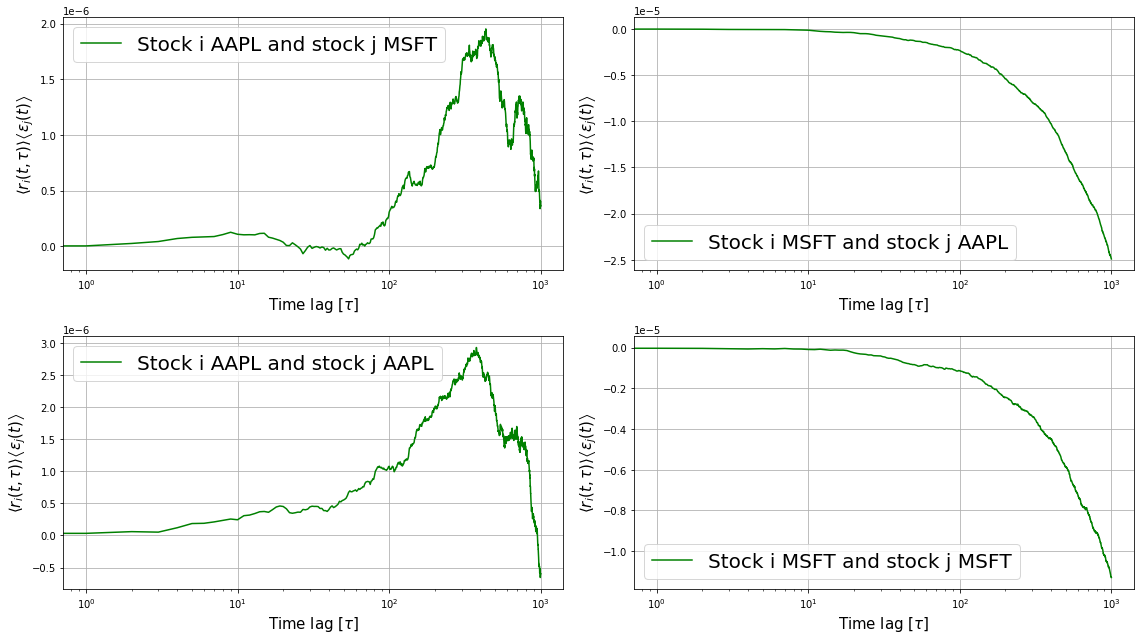

In [3]:
cross1 = pickle.load(open('../Data/avg_return_sign_data/avg_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_j), 'rb'))
cross2 = pickle.load(open('../Data/avg_return_sign_data/avg_201603%s_%si_%sj.pickl' % (day, ticker_j, ticker_i), 'rb'))
cross3 = pickle.load(open('../Data/avg_return_sign_data/avg_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_i), 'rb'))
cross4 = pickle.load(open('../Data/avg_return_sign_data/avg_201603%s_%si_%sj.pickl' % (day, ticker_j, ticker_j), 'rb'))

plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace = 0, wspace = 0)

ax1 = plt.subplot(221)
plot1 = plt.semilogx(cross1, '-g', label='Stock i %s and stock j %s' % (ticker_i, ticker_j))
#plt.setp(ax1.get_xticklabels(), visible=False)
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'$ \left \langle r_{i}\left ( t, \tau \right ) \right \rangle \left \langle \epsilon_{j} \left ( t \right ) \right \rangle $', fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)

ax2 = plt.subplot(222)
plot2 = plt.semilogx(cross2, '-g', label='Stock i %s and stock j %s' % (ticker_j, ticker_i))
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'$ \left \langle r_{i}\left ( t, \tau \right ) \right \rangle \left \langle \epsilon_{j} \left ( t \right ) \right \rangle $', fontsize=15)
#plt.setp(ax2.get_xticklabels(), visible = False)
#plt.setp(ax2.get_yticklabels(), visible = False)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)

ax3 = plt.subplot(223)
plot3 = plt.semilogx(cross3, '-g', label='Stock i %s and stock j %s' % (ticker_i, ticker_i))
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'$ \left \langle r_{i}\left ( t, \tau \right ) \right \rangle \left \langle \epsilon_{j} \left ( t \right ) \right \rangle $', fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)

ax4 = plt.subplot(224)
plot4 = plt.semilogx(cross4, '-g', label='Stock i %s and stock j %s' % (ticker_j, ticker_j))
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'$ \left \langle r_{i}\left ( t, \tau \right ) \right \rangle \left \langle \epsilon_{j} \left ( t \right ) \right \rangle $', fontsize=15)
#plt.setp(ax4.get_yticklabels(), visible = False)
plt.legend(loc='best', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)

plt.tight_layout()

plt.savefig('avg_product.png')